<a href="https://colab.research.google.com/github/DineishVS/Happy_Sad_Detection/blob/main/Happy_or_Sad_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow tensorflow gpu opoencv-python matplotlib

ERROR: Could not find a version that satisfies the requirement gpu (from versions: none)
ERROR: No matching distribution found for gpu


In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import cv2
import imghdr

In [3]:
data_dir='data'

In [4]:
image_exts=['jpeg','jpg','bmp','png']

In [5]:
os.listdir(os.path.join('data_dir','Happy'))

['happy-indians_5f66fd46d9f5b.jpg',
 'happy-people-2.jpg',
 'friends_190412.jpg',
 'image22.jpeg',
 'images23.jpg',
 'WorldHappinessReport_620.jpg',
 'images2.jpg',
 'images10.jpg',
 'hand-drawn-happy-people-jumping_23-2149092878.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '1_617fd1e2590c2.jpg',
 'friends-happy-190821.jpg',
 'happy-woman-in-nature-at-sunset.jpg',
 'ipsos-global-advisor-happiness-2022-opti.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 'image17.jpeg',
 'How_Happy_Are_People_at_Work.jpg',
 'happy_1_1678616873966_1678616915228_1678616915228.jpg',
 'young-and-happy-people-vector-15114154.jpg',
 '988689_Wallpaper2.jpg',
 'happy-people12.jpg',
 'images14.jpg',
 'goup-happy-people-35582464.jpg',
 '13ryLrJDyVF05wXDYYUXcJQ.jpeg',
 'compassion.jpg',
 'images16.jpg',
 'Happy-Guy.jpg',
 'traitshappypeople.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg

In [6]:
for image_class in os.listdir('data_dir'):
  for image in os.listdir(os.path.join('data_dir',image_class)):
    image_path=os.path.join('data_dir',image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exts:
        print("image not in ext list {}".format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))




image not in ext list data_dir/Happy/traitshappypeople.jpg
image not in ext list data_dir/Happy/guilherme-stecanella-375176-unsplash.jpg
image not in ext list data_dir/sad/depressed-woman-sitting-alone-on-600nw-2184735157.jpg
image not in ext list data_dir/sad/image-sad-office-girl-asian-260nw-2122701080.jpg
image not in ext list data_dir/sad/sad-young-woman-feeling-stressed-footage-107160392_iconl.jpeg
image not in ext list data_dir/sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg
image not in ext list data_dir/sad/depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
image not in ext list data_dir/sad/portrait-sad-man-600nw-126009806.jpg
image not in ext list data_dir/sad/sad-person-pictures-2560-x-1707-a8ginomrbkhyh3ri.jpg


In [28]:
data=tf.keras.utils.image_dataset_from_directory('data_dir')

Found 116 files belonging to 2 classes.


In [30]:
data_iterator=data.as_numpy_iterator()

In [31]:
batch= data_iterator.next()

In [33]:
batch

(array([[[[253.       , 169.       ,   8.15625  ],
          [254.46875  , 168.46875  ,   7.46875  ],
          [254.       , 168.       ,   7.       ],
          ...,
          [253.       , 169.       ,   9.       ],
          [254.0625   , 168.46875  ,   8.53125  ],
          [254.6875   , 169.       ,   8.15625  ]],
 
         [[253.       , 169.       ,   8.15625  ],
          [254.       , 168.       ,   7.       ],
          [254.       , 168.       ,   7.       ],
          ...,
          [253.       , 169.       ,   9.       ],
          [254.0625   , 168.46875  ,   8.53125  ],
          [254.6875   , 169.       ,   8.15625  ]],
 
         [[254.6875   , 169.       ,   8.15625  ],
          [253.0625   , 168.       ,   7.       ],
          [254.       , 168.       ,   7.       ],
          ...,
          [253.       , 169.       ,   9.       ],
          [254.0625   , 168.46875  ,   8.53125  ],
          [254.6875   , 169.       ,   8.15625  ]],
 
         ...,
 
         [[2

In [34]:
batch[0].shape

(32, 256, 256, 3)

In [35]:
batch[1]

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int32)

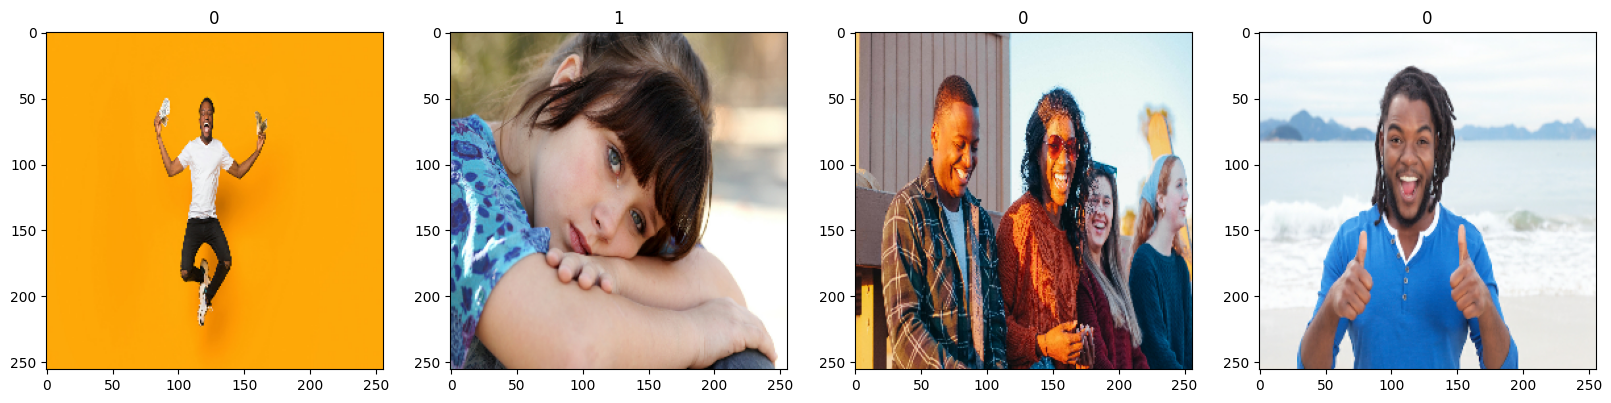

In [36]:
fig,ax=plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [37]:
scale=batch[0]/255

In [38]:
scale.max()

1.0

In [39]:
data=data.map(lambda x,y: (x/255,y))

In [40]:
scaled_iterator=data.as_numpy_iterator()

In [43]:
batch=scaled_iterator.next()[0]

In [ ]:
fig,ax=plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [46]:
len(data)

4

In [49]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [50]:
train_size=val_size+test_size

In [51]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [56]:
model=Sequential()

In [57]:
model.add(Conv2D(16, (3,3), 1, activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

In [58]:
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

In [59]:
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

In [60]:
model.add(Flatten())

In [61]:
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [62]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

In [66]:
LOG_DIR = '/tmp/log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [ ]:
! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip ngrok-stable-linux-amd64.zip

In [68]:
get_ipython().system_raw('./ngrok http 6006 &')

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
logdir='logs'

In [71]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=LOG_DIR)

In [73]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
2/2 [==============================] - 8s 3s/step - loss: 2.0859 - accuracy: 0.4688 - val_loss: 0.8460 - val_accuracy: 0.4375
Epoch 2/20
2/2 [==============================] - 9s 5s/step - loss: 0.6624 - accuracy: 0.5781 - val_loss: 0.6564 - val_accuracy: 0.5312
Epoch 3/20
2/2 [==============================] - 9s 5s/step - loss: 0.6307 - accuracy: 0.5781 - val_loss: 0.6695 - val_accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 7s 4s/step - loss: 0.6945 - accuracy: 0.4844 - val_loss: 0.6560 - val_accuracy: 0.5312
Epoch 5/20
2/2 [==============================] - 8s 5s/step - loss: 0.6634 - accuracy: 0.4844 - val_loss: 0.6756 - val_accuracy: 0.4688
Epoch 6/20
2/2 [==============================] - 6s 4s/step - loss: 0.6642 - accuracy: 0.6406 - val_loss: 0.6592 - val_accuracy: 0.8438
Epoch 7/20
2/2 [==============================] - 8s 5s/step - loss: 0.6571 - accuracy: 0.7656 - val_loss: 0.6425 - val_accuracy: 0.7812
Epoch 8/20
2/2 [=========================

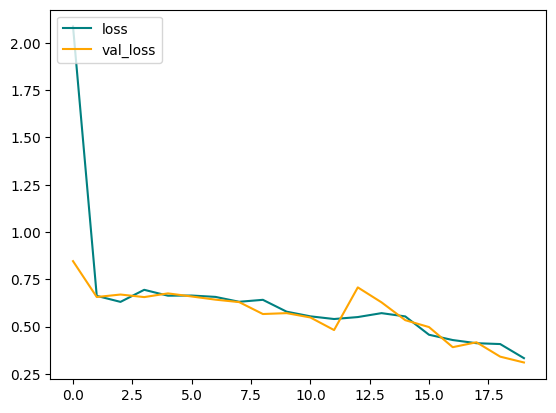

In [76]:
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

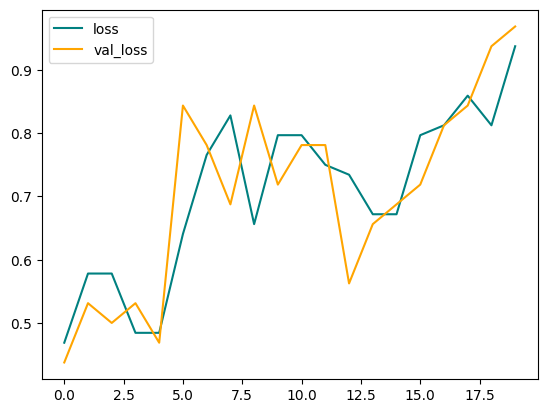

In [78]:
plt.plot(hist.history['accuracy'],color='teal', label='loss')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_loss')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [79]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [80]:
pre = Precision()
re=Recall()
acc=BinaryAccuracy()


In [81]:
len(test)

1

In [83]:
for batch in test.as_numpy_iterator():
  X, y=batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 1s 837ms/step


In [84]:
print(f'Precision:{pre.result().numpy}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.0>>, Recall:1.0, Accuracy:1.0


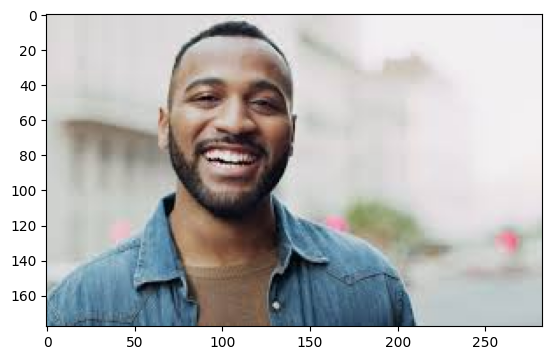

In [109]:
img=cv2.imread('hap.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

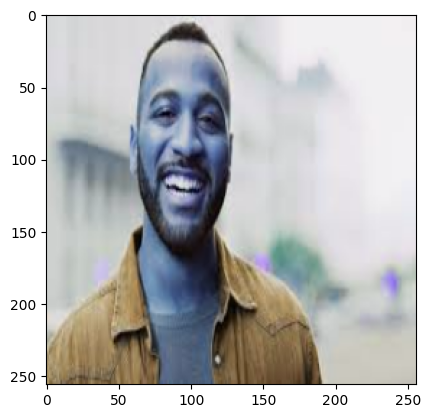

In [110]:
resize=tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize, 0)

In [116]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 37ms/step


In [117]:
yhat

array([[0.5712214]], dtype=float32)

In [118]:
if yhat >0.5:
  print("Predicted image is Happy")
else:
  print("Predicted image is Sad")

Predicted image is Happy


In [120]:
from tensorflow.keras.models import load_model

In [121]:
model.save(os.path.join('models','happysadmodels.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [125]:
new_model = load_model(os.path.join('models','happysadmodels.h5'))

In [126]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 102ms/step


array([[0.5712214]], dtype=float32)

In [127]:
if yhat >0.5:
  print("Predicted image is Happy")
else:
  print("Predicted image is Sad")

Predicted image is Happy
